The features listed appear to be related to a dataset used for predicting heart disease. Here's a breakdown of each feature:

1. **Age**: The age of the individual, which can be a significant factor in assessing heart disease risk as the prevalence of heart disease increases with age.
  
2. **Sex**: The gender of the individual, which can also play a role in determining heart disease risk as certain risk factors may vary between sexes.

3. **CP (Chest Pain Type)**: The type of chest pain experienced by the individual, which is a crucial symptom often associated with heart disease.

4. **Resting Blood Pressure (trestbps)**: The blood pressure of the individual while at rest, which is an important cardiovascular health indicator.

5. **Cholesterol (chol)**: The level of cholesterol in the individual's blood, another critical risk factor for heart disease.

6. **Fasting Blood Sugar (fbs)**: The fasting blood sugar level of the individual, which can indicate diabetes or prediabetes, both of which are significant risk factors for heart disease.

7. **Resting Electrocardiographic Results (restecg)**: The results of the resting electrocardiogram, which can provide insights into the heart's electrical activity and potential abnormalities.

8. **Maximum Heart Rate Achieved (thalach)**: The maximum heart rate achieved during exercise, which is an important measure of cardiovascular fitness and health.

9. **Exercise Induced Angina (exang)**: Whether the individual experiences exercise-induced angina, which is chest pain or discomfort due to reduced blood flow to the heart.

10. **ST Depression Induced by Exercise Relative to Rest (oldpeak)**: The amount of ST segment depression on an electrocardiogram during exercise compared to rest, which is another indicator of potential heart disease.

11. **Slope of the Peak Exercise ST Segment (slope)**: The slope of the peak exercise ST segment on the electrocardiogram, which provides additional information about heart function during exercise.

12. **Number of Major Vessels (ca)**: The number of major blood vessels (0-3) that are blocked or narrowed due to heart disease.

13. **Thalassemia (thal)**: A blood disorder that can affect oxygen transport, which is categorized into different types, each potentially impacting heart disease risk differently.

14. **Target**: This likely represents the presence or absence of heart disease, with a binary classification where 1 indicates the presence and 0 indicates the absence of heart disease.

Each of these features plays a role in assessing the risk of heart disease and is commonly used in predictive models and diagnostic assessments.

Identifying the most important features for predicting heart disease typically involves using techniques like feature importance analysis, which can vary depending on the specific dataset and modeling approach. However, based on general medical knowledge and common practices in cardiovascular risk assessment, some features are typically considered more important than others. Here's a selection of features that are often considered particularly important:

1. **Age**: Advanced age is a significant risk factor for heart disease.

2. **Sex**: Biological differences between males and females can influence heart disease risk.

3. **Chest Pain Type (CP)**: Different types of chest pain can provide valuable diagnostic information.

4. **Resting Blood Pressure (trestbps)**: High blood pressure is a major risk factor for heart disease.

5. **Cholesterol (chol)**: Elevated cholesterol levels contribute to atherosclerosis and heart disease.

6. **Fasting Blood Sugar (fbs)**: High fasting blood sugar levels may indicate diabetes, a significant risk factor for heart disease.

7. **Maximum Heart Rate Achieved (thalach)**: Low maximum heart rate during exercise can indicate cardiovascular dysfunction.

8. **Exercise Induced Angina (exang)**: Chest pain during exercise suggests reduced blood flow to the heart.

9. **ST Depression Induced by Exercise Relative to Rest (oldpeak)**: ST segment depression during exercise is indicative of myocardial ischemia.

10. **Number of Major Vessels (ca)**: The severity of coronary artery disease, as indicated by the number of major vessels affected, is crucial.

11. **Thalassemia (thal)**: Certain types of thalassemia can affect heart function and increase heart disease risk.

These features are often included in predictive models and clinical risk assessments due to their strong associations with heart disease. However, the importance of each feature can vary depending on the specific population and context of the analysis.

In [126]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [127]:
df = pd.read_csv('datasets\heart.csv')

In [128]:
df.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [130]:
df.shape

(1025, 14)

In [131]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [132]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [133]:
df['target'].unique()

array([0, 1], dtype=int64)

In [134]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

## Analysis and Visualization

In [135]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [136]:
print(df.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


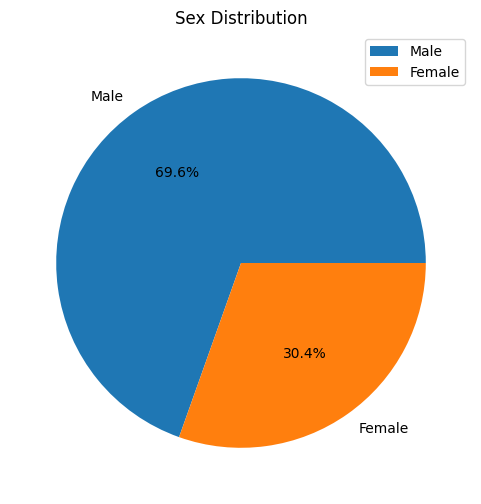

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'sex' column
sex_count = df['sex'].value_counts().reset_index()
sex_count.columns = ['sex', 'count']

# Optional: Convert 0/1 to readable labels
sex_count['sex'] = sex_count['sex'].map({0: 'Female', 1: 'Male'})

# Plotting the pie chart
sex_count.plot.pie(
    y='count',
    labels=sex_count['sex'],
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Sex Distribution'
)

plt.ylabel('')  # Optional: Removes y-label
plt.show()


<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

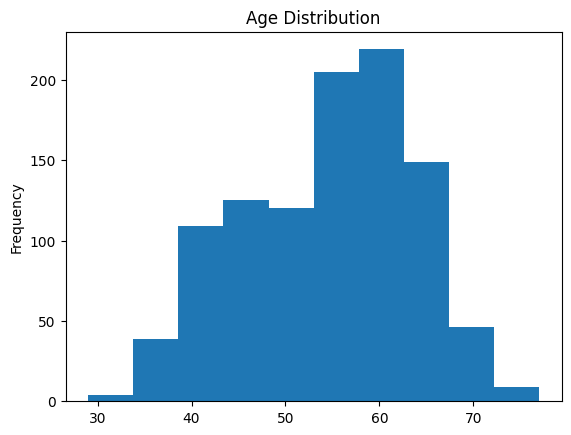

In [138]:
df['age'].plot(kind='hist',title='Age Distribution')

In [139]:
cp_count=df['cp'].value_counts() 
cp_count

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [140]:
import plotly.express as px
import pandas as pd

# Step 1: Get chest pain value counts
cp_count = df['cp'].value_counts().sort_index()

# Optional: Map cp codes to readable names
cp_labels = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal Pain',
    3: 'Asymptomatic'
}
cp_count.index = cp_count.index.map(cp_labels)

# Step 2: Create Pie Chart
fig = px.pie(
    names=cp_count.index,
    values=cp_count.values,
    title='Chest Pain Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.show()



<Axes: title={'center': 'Resting Blood Pressure Distribution'}, ylabel='Frequency'>

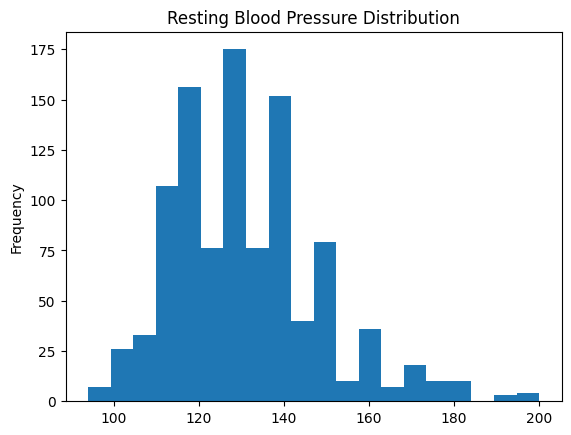

In [141]:
df['trestbps'].plot(kind='hist', bins=20, title='Resting Blood Pressure Distribution')

<Axes: title={'center': 'Serum Cholesterol Distribution'}, ylabel='Frequency'>

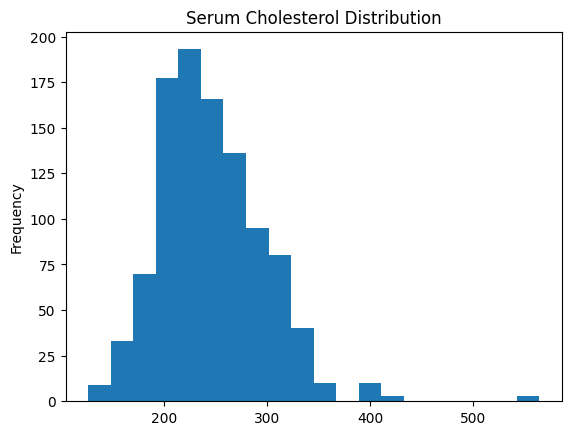

In [142]:
df['chol'].plot(kind='hist', bins=20, title='Serum Cholesterol Distribution') 

In [143]:
px.pie(df,'fbs', title='Fasting Blood Sugar Distribution',color_discrete_sequence=px.colors.sequential.RdBu)

<Axes: title={'center': 'Maximum Heart Rate Distribution'}, ylabel='Frequency'>

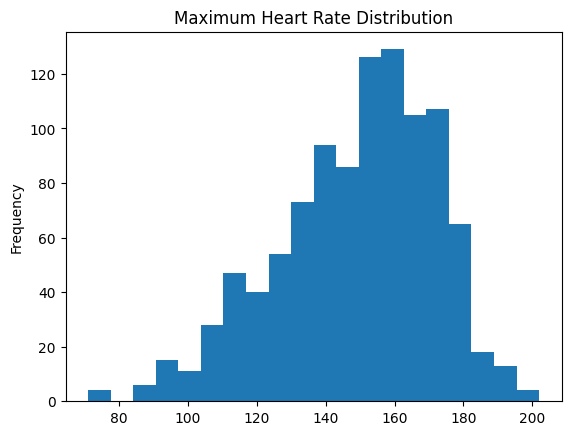

In [144]:
df['thalach'].plot(kind='hist', bins=20, title='Maximum Heart Rate Distribution')

<Axes: title={'center': 'Number of Major Vessels Distribution'}>

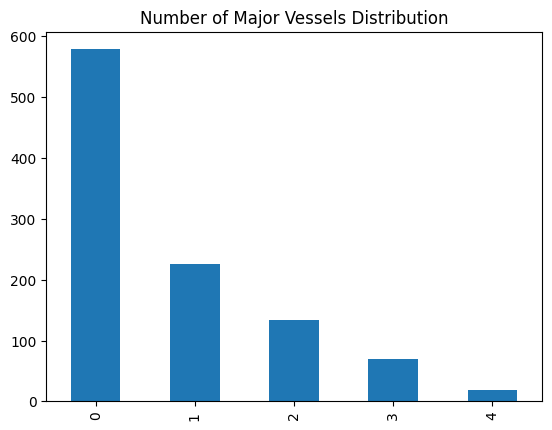

In [145]:
df['ca'].value_counts().plot(kind='bar', title='Number of Major Vessels Distribution')

In [146]:
target_count=df['target'].value_counts().reset_index(name='Count')
target_count

,index,Count
0,1,526
1,0,499


In [147]:
target_count = df['target'].value_counts().reset_index(name='Count')
target_count.columns = ['target', 'Count']


In [148]:
import plotly.express as px

fig = px.pie(
    target_count,
    names='target',
    values='Count',
    title='Target Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.show()


In [149]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [150]:
px.scatter(df, x='age', y='thalach', title='Age vs Maximum Heart Rate Achieved',labels={'age': 'Age', 'thalach': 'Max Heart Rate'}) 

In [151]:
px.scatter(df, x='trestbps', y='chol', title='Resting Blood Pressure vs Cholesterol Level',labels={'trestbps': 'Resting Blood Pressure', 'chol': 'Cholesterol Level'}) 


In [152]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset
# and 'columns_to_drop' is a list of column names you want to drop

df.drop(columns=['restecg','slope'], inplace=True)  # Drops specified columns from the DataFrame in-place
df

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,target
0,52,1,0,125,212,0,168,0,1.0,2,3,0
1,53,1,0,140,203,1,155,1,3.1,0,3,0
2,70,1,0,145,174,0,125,1,2.6,0,3,0
3,61,1,0,148,203,0,161,0,0.0,1,3,0
4,62,0,0,138,294,1,106,0,1.9,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,164,1,0.0,0,2,1
1021,60,1,0,125,258,0,141,1,2.8,1,3,0
1022,47,1,0,110,275,0,118,1,1.0,1,2,0
1023,50,0,0,110,254,0,159,0,0.0,0,2,1


In [153]:
X = df.drop('target', axis=1)
y = df['target']

In [154]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'ca', 'thal'],
      dtype='object')

In [155]:

y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [156]:
## Slpit the dataset for training purpose
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Now, we will apply different ML algorithms to find out the best accuracy-yielding algorithm for our application:

In [157]:
# Creating empty lists of accuracy and models to compare.
accuracy = []
modelName = []

### Logistic Regression:

In [158]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

# Making predictions and printing metrics:
logisticReg.fit(X_train, y_train)
predLogistic = logisticReg.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accLR = accuracy_score(y_test, predLogistic)
accuracy.append(accLR)
modelName.append("Logistic Regression")
print(classification_report(y_test, predLogistic))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       148
           1       0.79      0.92      0.85       160

    accuracy                           0.83       308
   macro avg       0.84      0.82      0.83       308
weighted avg       0.84      0.83      0.83       308



f:\Project\Health-Prognosis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

f:\Project\Health-Prognosis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Decision Trees

In [159]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dTree.fit(X_train, y_train)
predDT = dTree.predict(X_test)
accDT = accuracy_score(y_test, predDT)
accuracy.append(accDT)
modelName.append("Decision Trees")
# Printing the metrics
print(classification_report(y_test, predDT))

print("Accuracy on training dataset: {:.3f}".format(dTree.score(X_train,y_train)))
print("Accuracy on test  dataset:{:.3f}".format(dTree.score(X_test,y_test)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       148
           1       0.92      0.91      0.91       160

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308

Accuracy on training dataset: 0.944
Accuracy on test  dataset:0.909


### Support Vector Machine(SVM):

In [160]:
from sklearn.svm import SVC

SVMModel = SVC()
SVMModel.fit(X_train, y_train)
predSVM = SVMModel.predict(X_test)
accSVM = accuracy_score(y_test, predSVM)
accuracy.append(accSVM)
modelName.append("SVM")
# Printing the metrics
print(classification_report(y_test, predSVM))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       148
           1       0.68      0.76      0.72       160

    accuracy                           0.69       308
   macro avg       0.69      0.69      0.69       308
weighted avg       0.69      0.69      0.69       308



### Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(max_depth=5, n_estimators=100, random_state = 0)
RFModel.fit(X_train, y_train)
predRF = RFModel.predict(X_test)
accRF = accuracy_score(y_test, predRF)
accuracy.append(accRF)
modelName.append("Random Forest")
# Printing the metrics
print(classification_report(y_test, predRF))

print("Accuracy on training dataset: {:.3f}".format(RFModel.score(X_train,y_train)))
print("Accuracy on test  dataset:{:.3f}".format(RFModel.score(X_test,y_test)))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       148
           1       0.90      0.96      0.93       160

    accuracy                           0.92       308
   macro avg       0.93      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308

Accuracy on training dataset: 0.946
Accuracy on test  dataset:0.922


### Now I will visualize the accuracies of different models and choose the one that's the best:

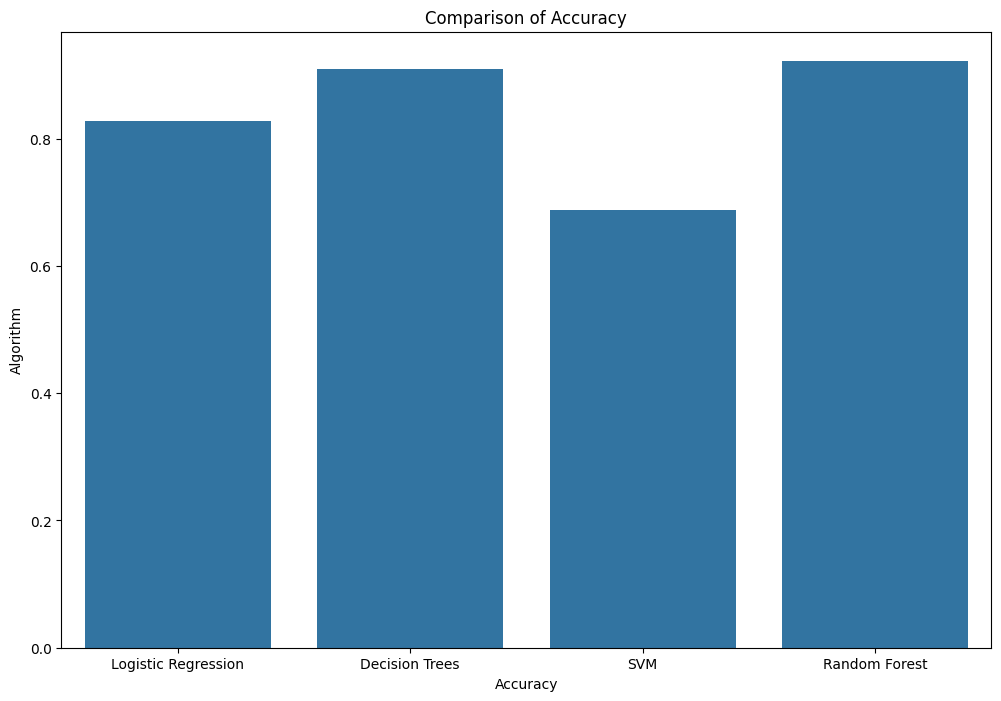

In [162]:
plt.figure(figsize=(12, 8))
plt.title("Comparison of Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
sns.barplot(x=modelName, y=accuracy)  # Specify x and y explicitly
plt.show()


### Since the accuracy of Random Forest is the maximum(92%, I KNOW!!), we choose RFModel as our web application's model.

In [163]:
# Making a prediction:
testData = X.iloc[3]
testPrediction = RFModel.predict([testData])
print(testPrediction)

[0]


f:\Project\Health-Prognosis\venv\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



### Saving the model using Pickle library:

In [164]:
import pickle
pickle_out = open("heart_model.pkl", "wb")
pickle.dump(RFModel, pickle_out)
pickle_out.close()